In [274]:
import csv
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
from sklearn.decomposition import PCA
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
import string
%matplotlib inline 

def cleanToLetters(str):
    remainingChars = []
    for ch in str:
        if (ch in string.ascii_letters or ch == ' '):
            remainingChars.append(ch)
    newString = string.join(remainingChars, "")
    return newString.lower()

def removeStopWords(str, set):
    toks = str.split()
    new_toks = []
    for elem in toks:
        if elem not in set:
            new_toks.append(elem)
    return string.join(new_toks, " ");

def printMostCommonWords(vectorizer, component):
    cuttOff = max(abs(component)) - 0.02
    for i in range(0, len(component)):
        if abs(component[i]) > cuttOff:
            for key, value in vectorizer.vocabulary_.iteritems():
                if (value == i):
                    print key

vectorizer = CountVectorizer(min_df=1, stop_words = 'english')
stop_words = vectorizer.get_stop_words()
#stop_words = ['you', 'the', 'and', 'a', 'an', 'how', 'as', 'or', 'we', 'i', 'be']

studentIds = []
passingIndicators = []
responses = []
rawReponses = []
grades = []
wordCounts = []
responses_w_stop_words = []
with open('schell9.txt', 'rb') as csvfile:
    responseReader = csv.reader(csvfile, delimiter="\t")
    i = 0
    for row in responseReader:
        studentId = row[0]
        course = row[6]
        numericGrade = row[9]
        letterGrade = row[10]
        response = row[13]
        
        if float(numericGrade) < 70:
            passingIndicator = 0
        else:
            passingIndicator = 1;
            
        if (True or course == 'M 408N'):
            if "xml" not in response and "0px" not in response and not "img" in response and len(cleanToLetters(response).strip()) > 3:
                studentIds.append(int(studentId))
                rawReponses.append(response)
                grades.append(float(numericGrade))
                cleaned = cleanToLetters(response)
                responses_w_stop_words.append(cleaned)
                wordCount = len(cleaned.split())
                wordCounts.append(wordCount)
                cleaned_no_stop_words = removeStopWords(cleaned, stop_words)
                responses.append(cleaned_no_stop_words)
                passingIndicators.append(passingIndicator)
                
data = {'studentId' : studentIds, 'grades' : grades, 'pass' : passingIndicators, 
        'responses' : responses, "raw" : rawReponses, 'wordCount' : wordCounts}
frame = pd.DataFrame(data)
frame.head()


,grades,pass,raw,responses,studentId,wordCount
0,91.913717,1,How to compute inverse trigonometry.,compute inverse trigonometry,1486608,5
1,91.913717,1,"Figuring out what the natural domain of f is,...",figuring natural domain f given functions,1486608,12
2,95.745009,1,I am still confused about inverse trig functi...,confused inverse trig functions understand def...,1486619,20
3,95.745009,1,"In general, I am a bit confused about everyth...",general bit confused think fixed small crash c...,1486619,57
4,95.745009,1,Daniel Garcia EID: djg2594 I had significant ...,daniel garcia eid djg significant trouble solv...,1486619,43


In [275]:

groupedStudentIds = []
groupedPassingIndicators = []
groupedResponses = []
groupedGrades = []
groupedWordCounts = []
for name, group in frame.groupby('studentId'):
    groupedStudentIds.append(name)
    groupedGrades.append(group['grades'].max())
    groupedPassingIndicators.append(group['pass'].max())
    groupedResponses.append(string.join(group['responses'].tolist(), ' '))
    groupedWordCounts.append(group['wordCount'].mean())

groupedData = {'studentId' : groupedStudentIds, 'grades' : groupedGrades, 
               'pass' : groupedPassingIndicators, 'responses' : groupedResponses,
               'wordCountMean' : groupedWordCounts}
groupedFrame = pd.DataFrame(groupedData)
groupedFrame.head()


,grades,pass,responses,studentId,wordCountMean
0,83.668937,1,dont quite understand arcs meansas difference ...,1486607,19.500000
1,91.913717,1,compute inverse trigonometry figuring natural ...,1486608,9.125000
2,80.108808,1,trouble question asked value x does fx arcsec...,1486609,10.233333
3,90.550902,1,little confused supposed deal traingles solvin...,1486610,20.500000
4,99.416510,1,add subtraction logs base set use calculator i...,1486611,14.666667


In [277]:
vectorizer = CountVectorizer(min_df=8, max_df = 0.05, ngram_range = (1, 4))
wordVector = vectorizer.fit_transform(groupedResponses)
vectorizer.vocabulary_


{u'dne': 410,
 u'fit': 564,
 u'needed': 1121,
 u'fundamental theorem': 636,
 u'rates questions': 1346,
 u'im doing wrong': 770,
 u'exact': 486,
 u'following': 565,
 u'derivatives dont': 348,
 u'sigma notation': 1482,
 u'bit difficult': 102,
 u'im having hard time': 776,
 u'practice finding': 1198,
 u'local max': 994,
 u'graph look': 680,
 u'graphed': 684,
 u'graphs derivatives': 694,
 u'certain functions': 116,
 u'understand indeterminate': 1678,
 u'largest delta': 895,
 u'wording': 1794,
 u'couple': 297,
 u'using product': 1747,
 u'confused need': 225,
 u'funtion': 638,
 u'absolute minimum': 6,
 u'having hard time': 720,
 u'sure im': 1570,
 u'sine cosine tangent': 1498,
 u'types discontinuity': 1658,
 u'does mean': 414,
 u'linear approximations': 974,
 u'equals': 466,
 u'thank julia serna': 1590,
 u'understand know': 1681,
 u'understand concepts': 1668,
 u'ended': 457,
 u'confused dont relates': 189,
 u'tomorrow': 1627,
 u'practice confused': 1195,
 u'problem using': 1247,
 u'got wron

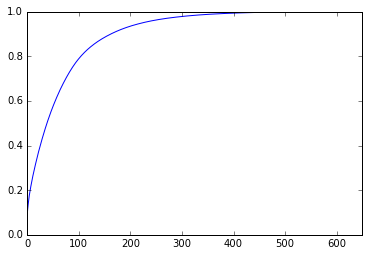

In [278]:
# View the accumulated sum of the eigenvalue ratios looking for the "elbow" to use as a cut off
pca = PCA(n_components=1000)
pca.fit(wordVector.toarray())

l = []
for i in range(0, len(pca.explained_variance_ratio_)):
    accumulatedVariance = sum(pca.explained_variance_ratio_[0:(i+1)])
    l.append(accumulatedVariance)
             
s = pd.Series(l)
s.plot()

In [282]:
# Obtain the base vectors for a 150 dimensional space.
pca = PCA(n_components=150)
pca.fit(wordVector.toarray())
wordVectorReduced = pca.transform(wordVector.toarray())


In [283]:
print "Common words in component 0:"
printMostCommonWords(vectorizer, pca.components_[0])
print "Common words in component 1:"
printMostCommonWords(vectorizer, pca.components_[1])
print "Common words in component 2:"
printMostCommonWords(vectorizer, pca.components_[2])
print "Common words in component 3:"
printMostCommonWords(vectorizer, pca.components_[3])
print "Common words in component 4:"
printMostCommonWords(vectorizer, pca.components_[4])

Common words in component 0:
confused dont
moment
represent
Common words in component 1:
confused dont
implict
implict differentiation
question confused dont
Common words in component 2:
moment
Common words in component 3:
moment
Common words in component 4:
confused dont
moment
went


model MSE: 152.822803911
MSE from average: 191.073745967


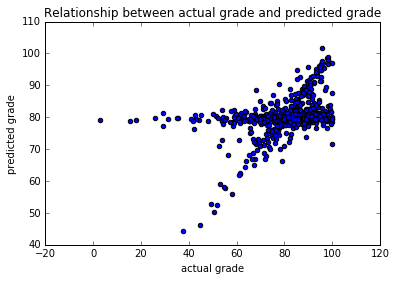

In [295]:
Y = np.array(groupedGrades, dtype = float)
X = pd.DataFrame(wordVectorReduced)
lm = LinearRegression()
lm.fit(X, Y)
groupedFrame["Predicted Grade"] = lm.predict(X)

plt.scatter(Y, lm.predict(X))
plt.xlabel("actual grade")
plt.ylabel("predicted grade")
plt.title("Relationship between actual grade and predicted grade")

print "model MSE:", np.mean((Y - lm.predict(X)) ** 2)
print "MSE from average:", np.mean((Y - np.mean(Y)) ** 2)


In [297]:
clf = LogisticRegression()
Y = np.array(groupedPassingIndicators, dtype = float)
clf.fit(X, Y)
groupedFrame["Pass Probabiliy"] = [x[1] for x in clf.predict_proba(X)]
groupedFrame.to_csv('predictions.csv')


In [298]:
groupedFrame.describe()

,grades,pass,studentId,wordCountMean,Pass Probabiliy,Predicted Grade
count,650.000000,650.000000,6.500000e+02,650.000000,650.000000,650.000000
mean,80.351200,0.812308,1.683980e+06,14.668015,0.808682,80.351200
std,13.833588,0.390767,1.314253e+05,9.252700,0.177397,6.189498
min,2.738720,0.000000,1.486607e+06,1.000000,0.002155,44.365185
25%,73.232621,1.000000,1.492604e+06,9.340909,0.780513,79.036022
50%,83.017495,1.000000,1.775382e+06,12.761473,0.815995,79.793012
75%,90.386979,1.000000,1.783553e+06,17.848485,0.911622,81.416185
max,100.011454,1.000000,1.867253e+06,67.000000,1.000000,101.871043
